In [ ]:
from google.colab import files
files.upload()

Saving diabetes_prediction_dataset.csv.zip to diabetes_prediction_dataset.csv.zip


{'diabetes_prediction_dataset.csv.zip': b'PK\x03\x04-\x00\x00\x08\x08\x00x1\x88V\x0e\x01\xc0T\xff\xff\xff\xff\xff\xff\xff\xff\x1f\x00\x14\x00diabetes_prediction_dataset.csv\x01\x00\x10\x004$:\x00\x00\x00\x00\x00\xe0u\x0b\x00\x00\x00\x00\x00\x8c\xbd\xcb\xae%;\x8e%8\xef\xaf\xa8\x0f8\xd80\x93\xec9\xecI\xa3{\xe0\xfd\x0b\x89|\xdc\xca\x0ctfD#"\xaa\x80\xfa\xfb2\x19E\x8a\\\x8b\xda\x1e\xb8#\xf7kn[&\xf1\xb9\xb8H\xfd\xfb\x1f\x7f\xfe\xb7?\xfe\xfa\xf3\xcf\xff\xfe\xc7\xcf\x7f\xfc\xaf\xff\xff\x8f\xbf\xfe\xfd\x8f?\xff\xedO\x7f\xf9\xf3\xcf\x7f\xfc\xf1\xcf\x7f\xfd\xfb?\xfd\xdb\x9f\xfe\xf6\xc7?\xff\xed\x8f\x9f\xbf\xfd\xd7_\xfe\xbf?\xfd\xf9\xdf\xff\xe9?\xfe\xf4\xb7\xbf\xff\xe5\xaf\xff\xeb\xe7_\xfe\xebO?\xff\xf7\xbf\xfc\x9f\xeb\xbf\xfe\xd3\x7f\xfe\xf1?\xff\xf8\xcf\x9f\x7f\xf9\xcf\xbf\xfc\xe5\xdf\xfe\xe9\xdf\xff\xf3\x7f\xfc\xeb_\xfe\xf6G\xff\xbb\x7f\xfb\xd3?\xff\xcb\x1f\x7f\xff\xe3o\xff\xc7\xff\xf5\xc7\x7f\xfd\xf3\x7f\xfe\xf1s-\x9f\xe5g\xf9Y\x7f\xfe\xfc\xfc\xef\xbf\xfe\x94\xfd\xb3\xde?\xc7\xe7\xf8Y\xb7\xe7\

In [ ]:
!unzip /content/diabetes_prediction_dataset.csv.zip

Archive:  /content/diabetes_prediction_dataset.csv.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset Cleaning

In [ ]:
# read data
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


1. Check Null Value


In [ ]:
# check for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

2. Check Duplicate Value

In [ ]:
# check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

3854
______Removed Duplicate______
0


# Exploratory Data Analysis

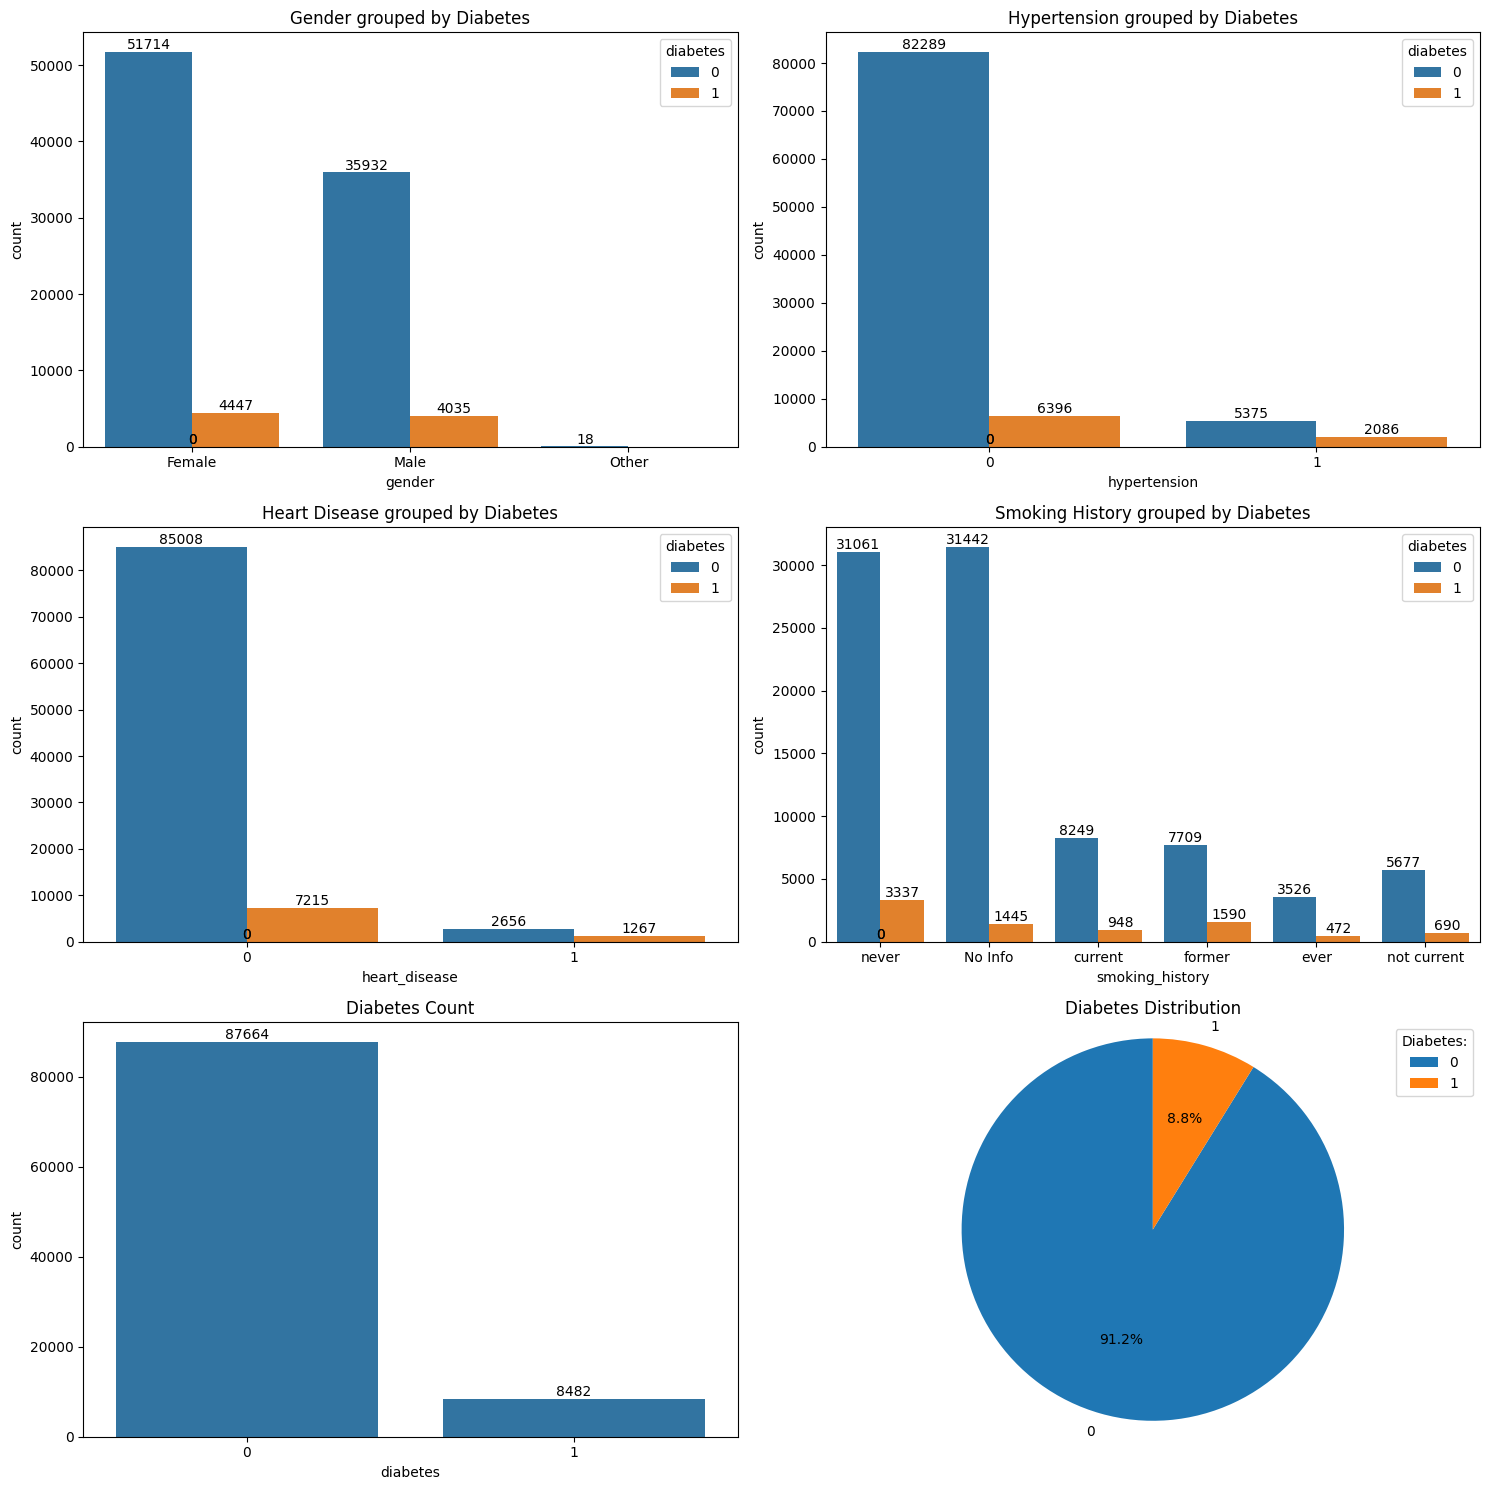

In [ ]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


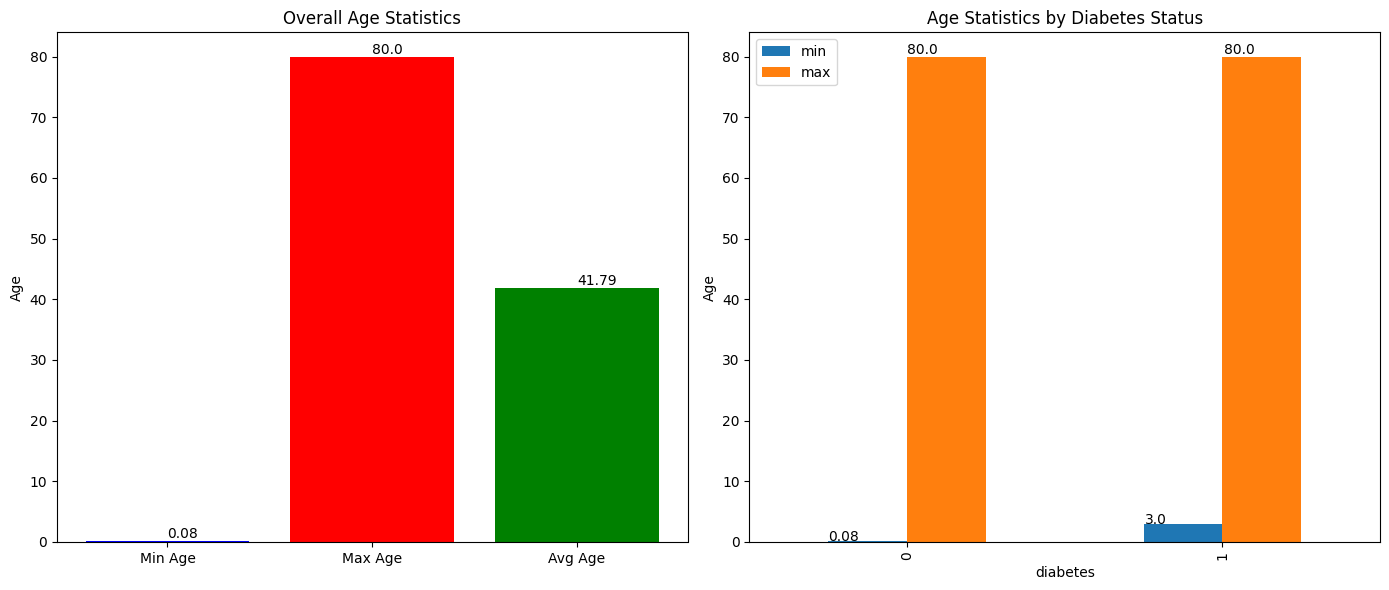

In [ ]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

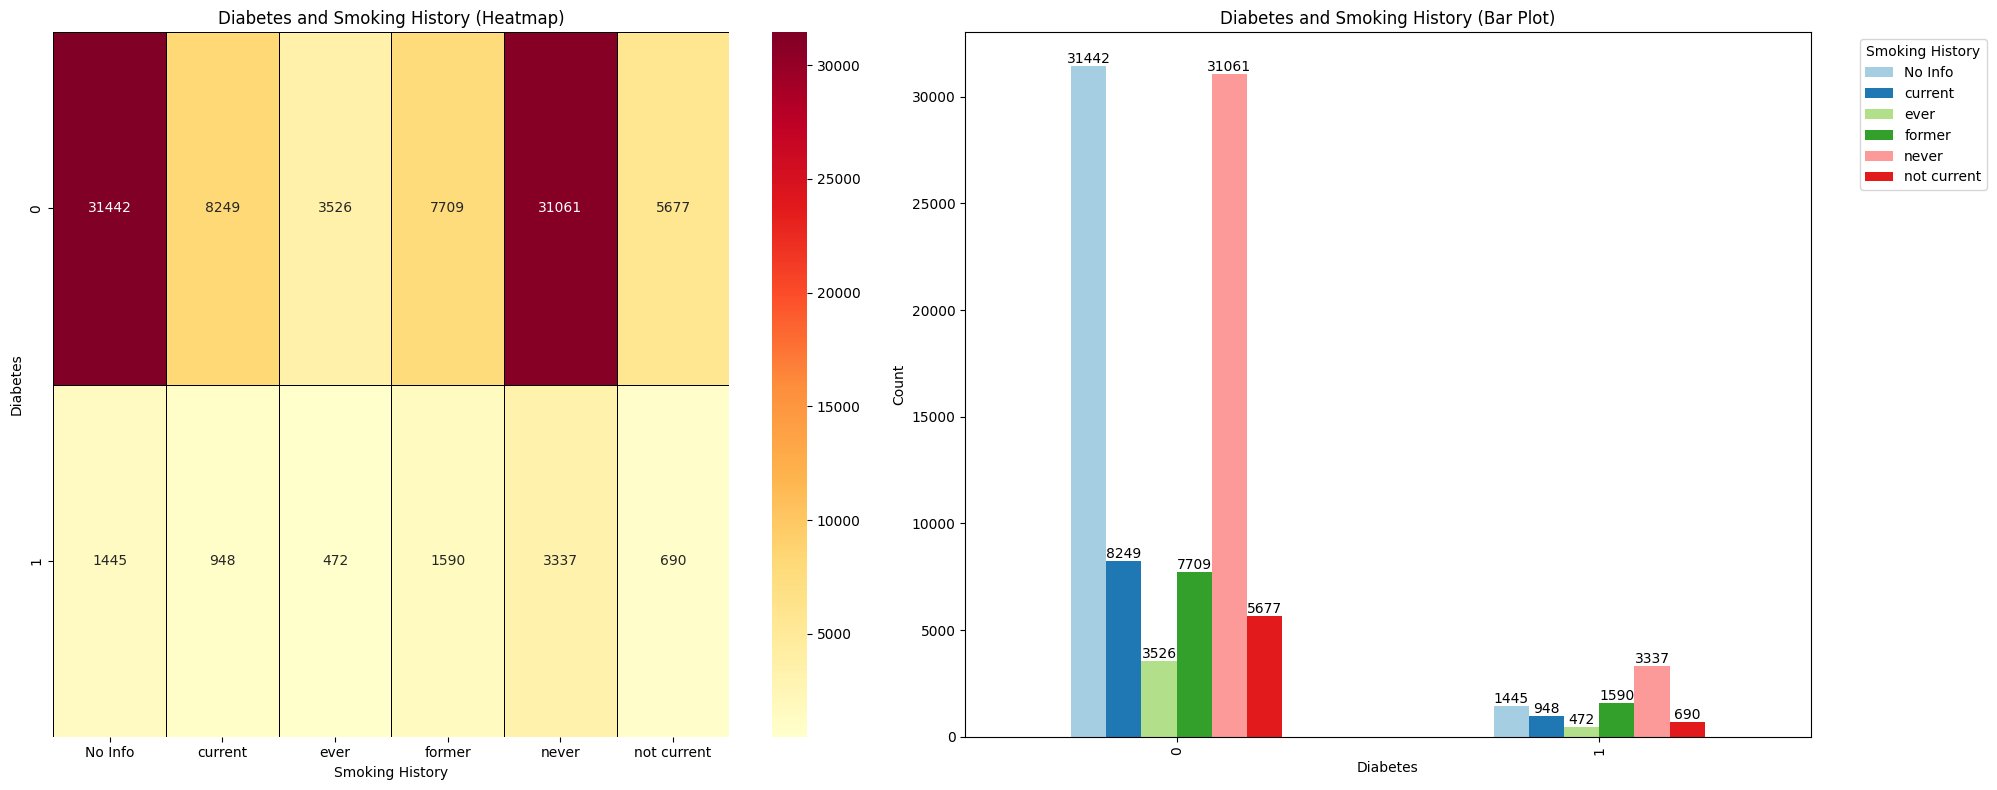

In [ ]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()


In [ ]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [37]:
print(df['smoking_history'])

0        4
1        0
2        4
3        1
4        1
        ..
99994    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 96146, dtype: int64


In [49]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
# Accessing mean and standard deviation
mean_values = scaler.mean_
std_deviation = scaler.scale_

print("Mean values applied by StandardScaler:")
print(mean_values)
print("\nStandard deviations applied by StandardScaler:")
print(std_deviation)

Mean values applied by StandardScaler:
[4.16065151e-01 4.17943257e+01 7.76007322e-02 4.08025295e-02
 2.23115886e+00 2.73214611e+01 5.53260874e+00 1.38218231e+02]

Standard deviations applied by StandardScaler:
[ 0.49328427 22.46283076  0.26754226  0.19783246  1.87995317  6.76768037
  1.07322644 40.90955861]


In [56]:
# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(X_scaled[0])
print(X_pca[0])

[-0.84345919  1.7008397  -0.29005038  4.84853426  0.94089638 -0.31494707
  0.99456295  0.04355386]
[ 2.74655552  1.08794848  1.42444512 -2.6969846   3.21790302 -0.72581188
 -0.4230153   0.28567332]


<ipython-input-13-b7d41151aa06>:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f'Max: PC {max_index + 1}',


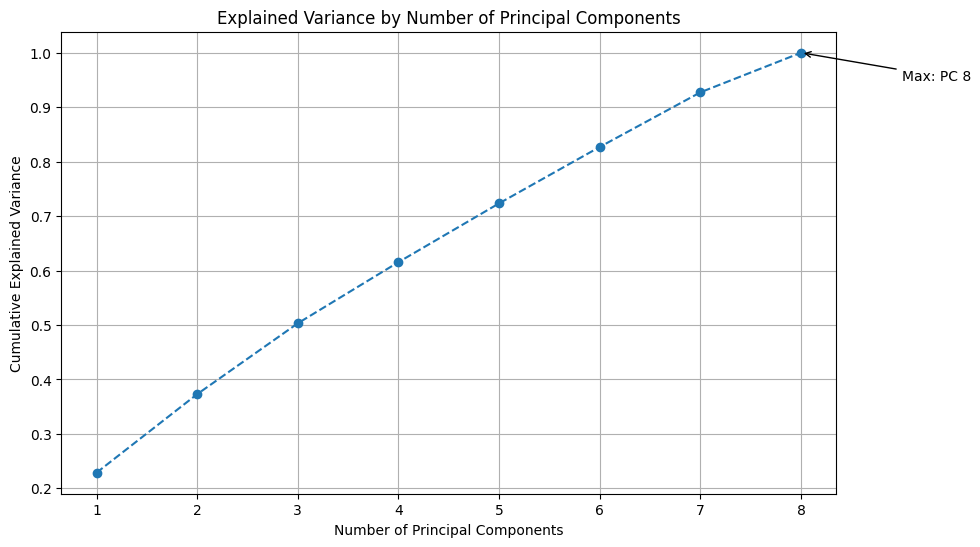

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [ ]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [58]:
components = pca.components_
print("First Principal Component:")
print(components[0])

First Principal Component:
[-0.01818327  0.56023698  0.38444105  0.30058253  0.33689183  0.4531226
  0.24825558  0.25925293]


In [57]:
import joblib
# Save PCA object (including components_, mean_, etc.) for later use
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

# Model Development

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [33]:
print(X_train)

[[-0.09241465  0.37961349 -1.22487943 ... -0.27130464  1.31933449
   0.22942489]
 [-2.8092418  -0.04692276  0.16413049 ...  0.84811397 -0.41791199
   0.35304702]
 [-0.19389345 -0.39377844 -0.31379617 ... -1.31083376 -0.08192954
  -1.15422003]
 ...
 [ 2.46602835 -0.02951951 -0.81291537 ...  0.50447237 -1.6616493
   0.33497434]
 [ 0.16087329 -0.48932759 -1.16303743 ... -0.16502647 -0.7200458
   0.12296595]
 [-0.88090213  0.89250303  0.68908157 ...  0.59304926  0.6878097
  -0.20260594]]


In [ ]:
# Define the ANN model
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(len(np.unique(y)), activation='softmax'))

In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Model Training

In [ ]:
# Train the model
history = model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
1923/1923 [==============================] - 5s 2ms/step - loss: 0.1278 - accuracy: 0.9555 - val_loss: 0.1069 - val_accuracy: 0.9638
Epoch 2/50
1923/1923 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9650 - val_loss: 0.0952 - val_accuracy: 0.9665
Epoch 3/50
1923/1923 [==============================] - 3s 2ms/step - loss: 0.0938 - accuracy: 0.9678 - val_loss: 0.0869 - val_accuracy: 0.9711
Epoch 4/50
1923/1923 [==============================] - 5s 2ms/step - loss: 0.0896 - accuracy: 0.9690 - val_loss: 0.0855 - val_accuracy: 0.9707
Epoch 5/50
1923/1923 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9695 - val_loss: 0.0848 - val_accuracy: 0.9718
Epoch 6/50
1923/1923 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9696 - val_loss: 0.0834 - val_accuracy: 0.9709
Epoch 7/50
1923/1923 [==============================] - 5s 2ms/step - loss: 0.0864 - accuracy: 0.9698 - val_loss: 0.0832 - val_accuracy:

In [ ]:
y_pred_prob = model_1.predict(X_test)
y_pred_classes = y_pred_prob.argmax(axis=1)

601/601 [==============================] - 1s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'ANN Accuracy: {accuracy:.4f}')
print(f'ANN Classification Report:\n{classification_report(y_test, y_pred_classes)}')

ANN Accuracy: 0.9702
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.98      0.68      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



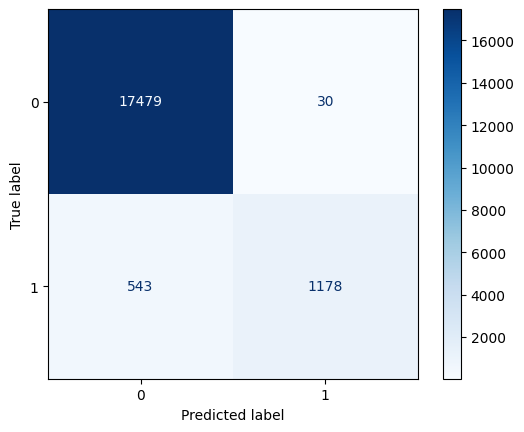

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Model Evaluation

In [ ]:
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9703
Recall: 0.9702
F1 Score: 0.9678


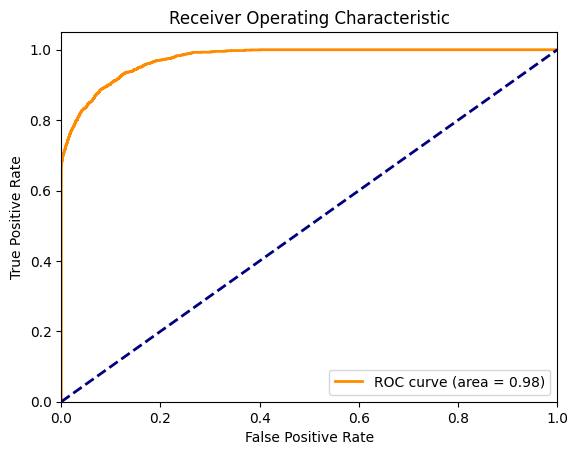

In [ ]:
if len(np.unique(y)) == 2:  # Only applicable for binary classification
    roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

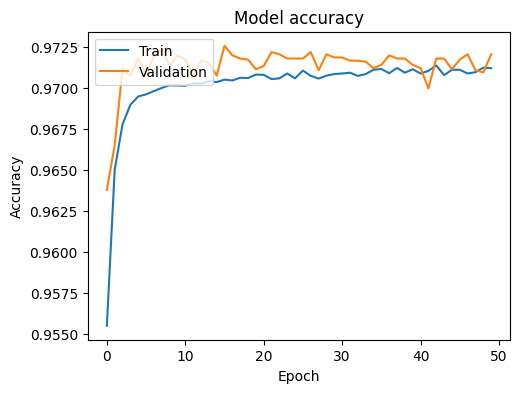

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

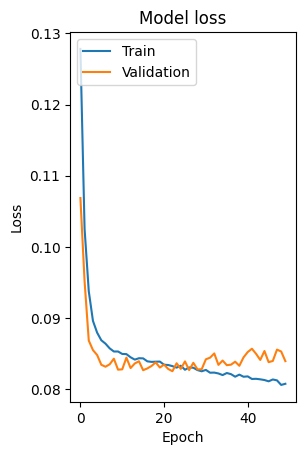

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1.save('ann_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2722 (10.63 KB)
Trainable params: 2722 (10.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


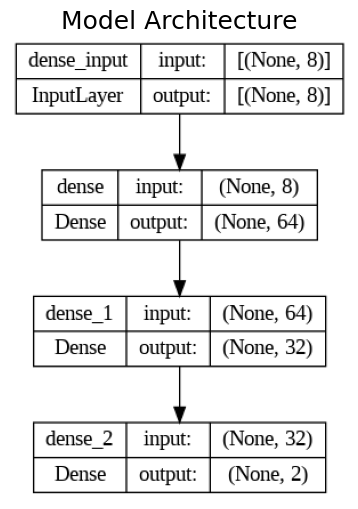

In [ ]:
from keras.utils import plot_model

file_name = 'architecture_model.png'

plot_model(model_1, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(6,6))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Model Architecture', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()